In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
import os

#print (os.listdir('/content/gdrive/My Drive/MILIZE/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/'))

### Cifar10 Semi-Supervised Learning

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from sklearn.model_selection import train_test_split 

import tensorflow as tf

from keras.models import Sequential
from keras.layers import InputLayer, Activation ,Dropout ,Flatten, Dense
from keras.layers import LeakyReLU, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D

from keras.layers.noise import GaussianNoise

from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 33s 0us/step


In [3]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


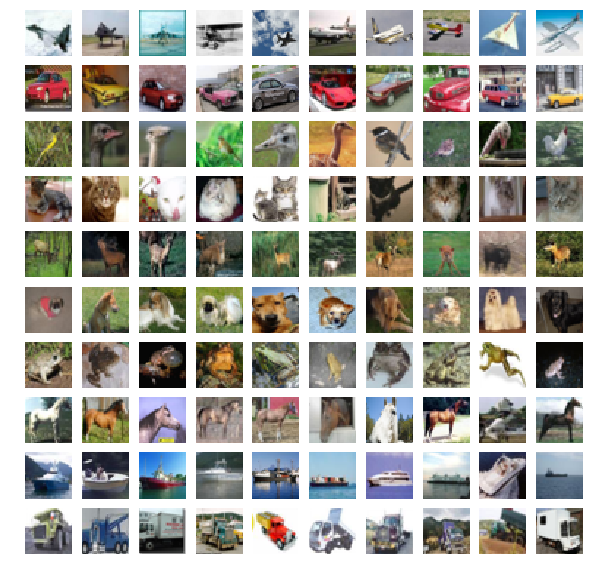

In [0]:
n_classes = 10
pos = 1

plt.figure(figsize=(10, 10))

for targetClass in tqdm(range(n_classes)):
  targetIdx = []
  # クラスclassIDの画像のインデックスリストを取得
  for i in range(len(y_train)):
    if y_train[i] == targetClass:
      targetIdx.append(i)

  # 各クラスからランダムに選んだ最初の10個の画像を描画
  np.random.shuffle(targetIdx)
  for idx in targetIdx[:10]:
    img = x_train[idx]
    plt.subplot(10, 10, pos)
    plt.imshow(img)
    plt.axis('off')
    pos += 1

plt.show()

In [0]:
n_classes = 10

x_train = x_train.astype(np.float)/255.0
y_train_oh = np.identity(n_classes)[y_train]

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train_oh, 
                                                       test_size=0.20, 
                                                       stratify=y_train,
                                                       random_state=100)

In [6]:
print (x_train.shape)
print (y_train.shape)
print (x_valid.shape)
print (y_valid.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [0]:
#input_shape = x_train.shape[1:]

#def create_model():
#  model = Sequential()
#  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', 
#                   input_shape=input_shape))
#  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#  model.add(MaxPooling2D(pool_size=(2, 2)))

#  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#  #model.add(BatchNormalization())
#  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#  #model.add(BatchNormalization())
#  model.add(MaxPooling2D(pool_size=(2, 2)))
#  #model.add(Dropout(0.3))

#  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#  #model.add(BatchNormalization())
#  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#  #model.add(BatchNormalization())
#  model.add(MaxPooling2D(pool_size=(2, 2)))
#  #model.add(Dropout(0.3))

#  model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
#  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#  #model.add(BatchNormalization())
#  model.add(MaxPooling2D(pool_size=(2, 2)))
#  #model.add(Dropout(0.3)) 

#  model.add(Flatten())
#  model.add(Dense(512, activation='relu'))
#  model.add(Dropout(0.5)) 
#  model.add(Dense(n_classes, activation='softmax'))
  
#  return model

In [0]:
input_shape = x_train.shape[1:]

def create_model():
  model = Sequential()
  model.add(InputLayer(input_shape=input_shape))
  model.add(GaussianNoise(0.15))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))           
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(LeakyReLU(0.1))           
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(512, (3, 3), padding='valid'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(256, (1, 1)))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(128, (1, 1)))
  model.add(LeakyReLU(0.1))           
    
  model.add(GlobalAveragePooling2D())
  model.add(Dense(n_classes, activation='softmax'))
  
  return model

In [15]:
model = create_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_2 (GaussianNo (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 32, 32, 128)       0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='max', 
                              verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, 
                                 factor=0.5, min_lr=0.00001, verbose=1)
callbacks = [early_stopping, lr_reduction]

In [0]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_valid, y_valid),
                    callbacks=callbacks,
                    verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 105s 3ms/step - loss: 1.8434 - acc: 0.2996 - val_loss: 1.5497 - val_acc: 0.4072
Epoch 2/10
40000/40000 [==============================] - 102s 3ms/step - loss: 1.4665 - acc: 0.4596 - val_loss: 1.3702 - val_acc: 0.4962
Epoch 3/10
40000/40000 [==============================] - 104s 3ms/step - loss: 1.2550 - acc: 0.5475 - val_loss: 1.1880 - val_acc: 0.5590
Epoch 4/10
40000/40000 [==============================] - 102s 3ms/step - loss: 1.1189 - acc: 0.6015 - val_loss: 1.1474 - val_acc: 0.5808
Epoch 5/10
40000/40000 [==============================] - 102s 3ms/step - loss: 1.0326 - acc: 0.6325 - val_loss: 1.0206 - val_acc: 0.6434
Epoch 6/10
40000/40000 [==============================] - 102s 3ms/step - loss: 0.9757 - acc: 0.6541 - val_loss: 0.9394 - val_acc: 0.6692
Epoch 7/10
40000/40000 [==============================] - 103s 3ms/step - loss: 0.9287 - acc: 0.6739 - val_loss: 0.9023 - 

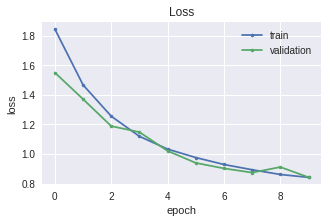

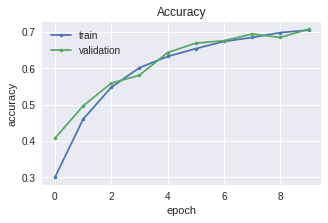

In [0]:
plt.figure(figsize =(5,3))
plt.plot(history.history['loss'], marker='.', label='train')
plt.plot(history.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='train')
plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

with data aumentation

In [0]:
datagen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

In [18]:
epochs = 10
batch_size = 32

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train)//batch_size, 
                              epochs=epochs,
                              validation_data=(x_valid, y_valid), 
                              validation_steps=len(x_valid)//batch_size,
                              callbacks=callbacks,
                              verbose=1)

Epoch 1/10
1250/1250 [==============================] - 100s 80ms/step - loss: 2.0542 - acc: 0.2230 - val_loss: 1.8747 - val_acc: 0.2992
Epoch 2/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.7552 - acc: 0.3418 - val_loss: 1.5097 - val_acc: 0.4482
Epoch 3/10
1250/1250 [==============================] - 98s 79ms/step - loss: 1.5900 - acc: 0.4176 - val_loss: 1.3209 - val_acc: 0.5018
Epoch 4/10
1250/1250 [==============================] - 98s 79ms/step - loss: 1.4785 - acc: 0.4650 - val_loss: 1.2619 - val_acc: 0.5358
Epoch 5/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.3937 - acc: 0.4997 - val_loss: 1.1583 - val_acc: 0.5856
Epoch 6/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.3362 - acc: 0.5202 - val_loss: 1.1805 - val_acc: 0.5803
Epoch 7/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.2831 - acc: 0.5387 - val_loss: 1.0666 - val_acc: 0.6202
Epoch 8/10
1250/1250 [=========================

In [19]:
plt.figure(figsize =(5,3))
plt.plot(history.history['loss'], marker='.', label='train')
plt.plot(history.history['val_loss'], marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='train')
plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

NameError: ignored

<Figure size 360x216 with 0 Axes>

Check eager_execution.ipynb

Eager mode

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

from sklearn.model_selection import train_test_split

In [0]:
print ("TensorFlow version: {}".format(tf.VERSION))
print ("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.12.0
Eager execution: True


Data

In [0]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print (mnist_images.shape)
print (mnist_labels.shape)

(60000, 28, 28)
(60000,)


In [0]:
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels, tf.int32)))

dataset = dataset.shuffle(1000).batch(32)

print (dataset)

<BatchDataset shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int32)>


Example 1 (MNIST)

In [0]:
#mnist_model = tf.keras.Sequential([
#  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
#  tf.keras.layers.GlobalAveragePooling2D(),
#  tf.keras.layers.Dense(10)
#])

mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(10, activation='softmax')
    tf.keras.layers.Dense(10)
])

In [0]:
for images,labels in dataset.take(2):
  print (images.shape)
  print (mnist_model(images).shape)
  print ('Logits: ', mnist_model(images)[:1].numpy())

(32, 28, 28, 1)
(32, 10)
Logits:  [[-0.8845177  -2.175113    1.9420677  -2.1558092   1.1331186  -0.94650215
   5.3078327  -3.0470169   2.5471184  -0.3914078 ]]
(32, 28, 28, 1)
(32, 10)
Logits:  [[-1.5578071   1.1617892   2.40897     1.9408671   0.7835284   2.0152261
   0.16677037 -1.834617    4.693721   -3.953016  ]]


In [0]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [0]:
optimizer = tf.train.AdamOptimizer()

loss_history = []

In [0]:
for (batch, (images, labels)) in tqdm(enumerate(dataset.take(300))):
  
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

  loss_history.append(loss_value.numpy())
  grads = tape.gradient(loss_value, mnist_model.variables)
  optimizer.apply_gradients(zip(grads, mnist_model.variables),
                            global_step=tf.train.get_or_create_global_step())
  
  
  #if (batch+1) % 10 == 0:
  #  print()
  #print('.', end='')


300it [00:07, 42.43it/s]


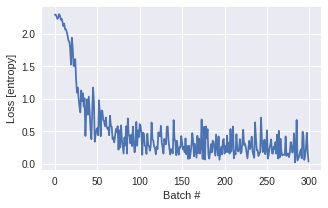

In [0]:
plt.figure(figsize=(5, 3))
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')
plt.show()

Example 2 (MINIST)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(10, activation='softmax')
    tf.keras.layers.Dense(10)
])

In [0]:
for images,labels in dataset.take(2):
  print (images.shape)
  print (model(images).shape)
  print ('Logits: ', model(images)[:1].numpy())

(32, 28, 28, 1)
(32, 10)
Logits:  [[-1.2986987   6.6163383   0.21518797 -0.1080678  -0.8680533  -2.330555
  -0.7385723  -2.1257148   0.5767906  -1.7687902 ]]
(32, 28, 28, 1)
(32, 10)
Logits:  [[ 5.4667873  -7.114881   -0.08976011  6.7406363  -4.249432    5.2671165
   1.9824954  -1.3837584   2.8716595  -1.7881808 ]]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [0]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

 
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, model.variables)

#optimizer = tf.train.AdamOptimizer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:
train_loss_results = []
train_accuracy_results = []
 
num_epochs = 3
 
for epoch in tqdm(range(num_epochs)):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in dataset.take(200):
    # Optimize the model
    grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables), 
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, x, y))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if (epoch+1) % 1 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch+1, 
                                                                epoch_loss_avg.result(), 
                                                                epoch_accuracy.result()))

 33%|███▎      | 1/3 [00:05<00:11,  5.96s/it]

Epoch 001: Loss: 2.289, Accuracy: 15.328%


 67%|██████▋   | 2/3 [00:11<00:05,  5.91s/it]

Epoch 002: Loss: 2.068, Accuracy: 39.000%


100%|██████████| 3/3 [00:17<00:00,  5.86s/it]

Epoch 003: Loss: 0.486, Accuracy: 86.547%


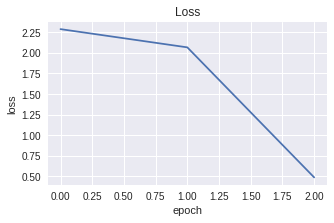

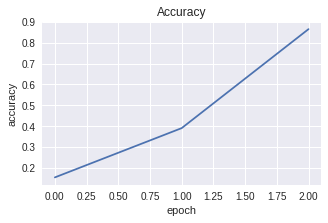

In [0]:
plt.figure(figsize =(5,3))
plt.plot(train_loss_results)
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(train_accuracy_results)
#plt.plot(history.history['val_acc'], marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.legend(loc='best')
plt.show()

Exapmle 3 (MINIST)

In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(mnist_images, mnist_labels, 
                                                     test_size=0.3,
                                                     random_state=100)

In [0]:
train_x = np.expand_dims(train_x, axis=-1) / 255.0
valid_x = np.expand_dims(valid_x, axis=-1) / 255.0

In [0]:
print (train_x.shape)
print (train_y.shape)
print (valid_x.shape)
print (valid_y.shape)

(42000, 28, 28, 1)
(42000,)
(18000, 28, 28, 1)
(18000,)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                          input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

In [0]:
train_x_tf = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y_tf = tf.convert_to_tensor(train_y, dtype=tf.int32)
valid_x_tf = tf.convert_to_tensor(valid_x, dtype=tf.float32)
valid_y_tf = tf.convert_to_tensor(valid_y, dtype=tf.int32)

In [0]:
print (train_x_tf.shape)
print (train_y_tf.shape)

(42000, 28, 28, 1)
(42000,)


In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
epoch_num = 3
batch_size = 32
 
optimizer = tf.train.AdamOptimizer()
 
#for epoch in tqdm(range(epoch_num), file=sys.stdout):
for epoch in tqdm(range(epoch_num)):
    
    n, _, _, _ = train_x_tf.shape
    n = n.value
    perm = np.random.permutation(n)
    
    for i in range(0, n, batch_size):
 
        batch_x = tf.gather(train_x_tf, perm[i:i+batch_size])
        batch_y = tf.gather(train_y_tf, perm[i:i+batch_size])
 
        grads = grad(model, batch_x, batch_y)
        optimizer.apply_gradients(zip(grads, model.variables), 
                                  global_step=tf.train.get_or_create_global_step())
 
    train_loss = loss(model, train_x_tf, train_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(train_x_tf), axis=1, output_type=tf.int32), 
                                  train_y_tf)
    train_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    valid_loss = loss(model, valid_x_tf, valid_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(valid_x_tf), axis=1, output_type=tf.int32), 
                                  valid_y_tf)
    valid_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    if (epoch+1)%1 == 0:
        tqdm.write('epoch:\t{}\ttrain/loss:\t{:.5f}\tvalid/loss:\t{:.5f}\ttrain/accuracy:\t{:.5f}\tvalid/accuracy:\t{:.5f}'.format(
            epoch, train_loss, valid_loss, train_acc, valid_acc)
                  )

 33%|███▎      | 1/3 [00:56<01:53, 56.52s/it]

epoch:	1	train/loss:	0.05493	valid/loss:	0.06653	train/accuracy:	0.98410	valid/accuracy:	0.97928


 67%|██████▋   | 2/3 [01:48<00:55, 55.21s/it]

epoch:	2	train/loss:	0.03473	valid/loss:	0.05170	train/accuracy:	0.98902	valid/accuracy:	0.98289


100%|██████████| 3/3 [02:40<00:00, 54.25s/it]

epoch:	3	train/loss:	0.02596	valid/loss:	0.04784	train/accuracy:	0.99174	valid/accuracy:	0.98544


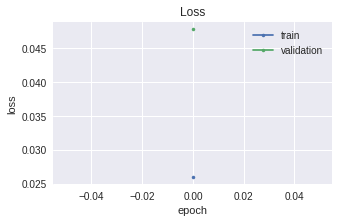

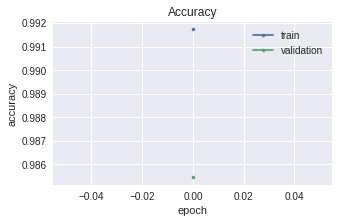

In [0]:
plt.figure(figsize =(5,3))
plt.plot(train_loss, marker='.', label='train')
plt.plot(valid_loss, marker='.', label='validation')
plt.title('Loss')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

plt.figure(figsize =(5,3))
plt.plot(train_acc, marker='.', label='train')
plt.plot(valid_acc, marker='.', label='validation')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

Example 4 (MINST)

In [0]:
x_train = np.reshape(mnist_images, (-1, 28*28)) / 255.0

print (mnist_images.shape)
print (mnist_labels.shape)
print (x_train.shape)

(60000, 28, 28)
(60000,)
(60000, 784)


In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(x_train, mnist_labels, 
                                                     test_size=0.3,
                                                     random_state=100)

In [0]:
print (train_x.shape)
print (train_y.shape)
print (valid_x.shape)
print (valid_y.shape)

(42000, 784)
(42000,)
(18000, 784)
(18000,)


In [0]:
train_x_tf = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y_tf = tf.convert_to_tensor(train_y, dtype=tf.int32)
valid_x_tf = tf.convert_to_tensor(valid_x, dtype=tf.float32)
valid_y_tf = tf.convert_to_tensor(valid_y, dtype=tf.int32)

In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
class Model():
    
    def __init__(self):
        input_size = 784
        output_size = 10
        hidden_size = 20
        self.fc1_w = tfe.Variable(tf.truncated_normal([input_size, hidden_size], stddev=0.1), dtype=tf.float32)
        self.fc1_b = tfe.Variable(tf.constant(0.1, shape=[hidden_size]), dtype=tf.float32)
        self.fc2_w = tfe.Variable(tf.truncated_normal([hidden_size, hidden_size], stddev=0.1), dtype=tf.float32)
        self.fc2_b = tfe.Variable(tf.constant(0.1, shape=[hidden_size]), dtype=tf.float32)
        self.fc3_w = tfe.Variable(tf.truncated_normal([hidden_size, output_size], stddev=0.1), dtype=tf.float32)
        self.fc3_b = tfe.Variable(tf.constant(0.1, shape=[output_size]), dtype=tf.float32)
        self.variables = [
            self.fc1_w, self.fc1_b,
            self.fc2_w, self.fc2_b,
            self.fc3_w, self.fc3_b
        ]
        
    def __call__(self, x):
        h = tf.nn.relu(tf.matmul(x, self.fc1_w) + self.fc1_b)
        h = tf.nn.relu(tf.matmul(h, self.fc2_w) + self.fc2_b)
        y_pre = tf.matmul(h, self.fc3_w) + self.fc3_b
        return y_pre
    
model = Model()

In [0]:
def loss(model, x, y):
  y_pre = model(x)
  y_oh = tf.one_hot(y, depth=10, dtype=tf.float32)
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=y_pre))
  return cross_entropy
 
def grad(model, x, y):
  with tf.GradientTape() as tape:
    loss_value = loss(model, x, y)
  return tape.gradient(loss_value, model.variables)

In [0]:
epoch_num = 3
batch_size = 32
 
optimizer = tf.train.AdamOptimizer()
 
#for epoch in tqdm(range(epoch_num), file=sys.stdout):
for epoch in tqdm(range(epoch_num)):
    
    n, _ = train_x_tf.shape
    n = n.value
    perm = np.random.permutation(n)
    
    for i in range(0, n, batch_size):
 
        batch_x = tf.gather(train_x_tf, perm[i:i+batch_size])
        batch_y = tf.gather(train_y_tf, perm[i:i+batch_size])
 
        grads = grad(model, batch_x, batch_y)
        optimizer.apply_gradients(zip(grads, model.variables), 
                                  global_step=tf.train.get_or_create_global_step())
 
    train_loss = loss(model, train_x_tf, train_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(train_x_tf), axis=1, output_type=tf.int32), 
                                  train_y_tf)
    train_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    valid_loss = loss(model, valid_x_tf, valid_y_tf)
    correct_prediction = tf.equal(tf.argmax(model(valid_x_tf), axis=1, output_type=tf.int32), 
                                  valid_y_tf)
    valid_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    if (epoch+1)%1 == 0:
        tqdm.write('epoch:\t{}\ttrain/loss:\t{:.5f}\tvalid/loss:\t{:.5f}\ttrain/accuracy:\t{:.5f}\tvalid/accuracy:\t{:.5f}'.format(
            epoch, train_loss, valid_loss, train_acc, valid_acc)
                  )

 33%|███▎      | 1/3 [00:38<01:16, 38.19s/it]

epoch:	0	train/loss:	0.33671	valid/loss:	0.37090	train/accuracy:	0.89933	valid/accuracy:	0.89189


 67%|██████▋   | 2/3 [01:16<00:38, 38.09s/it]

epoch:	1	train/loss:	0.23066	valid/loss:	0.26773	train/accuracy:	0.93017	valid/accuracy:	0.92100


100%|██████████| 3/3 [01:53<00:00, 38.04s/it]

epoch:	2	train/loss:	0.18009	valid/loss:	0.22618	train/accuracy:	0.94590	valid/accuracy:	0.93472


In [0]:
temp_1 = [0,10,20,30,40]
temp_2 = [0,2,4]
temp_3 = tf.gather(temp_1, temp_2)

print (temp_3)

tf.Tensor([ 0 20 40], shape=(3,), dtype=int32)


In [0]:
for i in range(0, 10, 3):
  print (i)

0
3
6
9
